In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.15.0


In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
train = pd.read_csv("/content/T1.csv")
test = pd.read_csv("/content/T1.csv")

In [ ]:
train.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
test.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
cols = train.columns.tolist()

Text(0.5, 1.0, 'Wind Speed (m/s)')

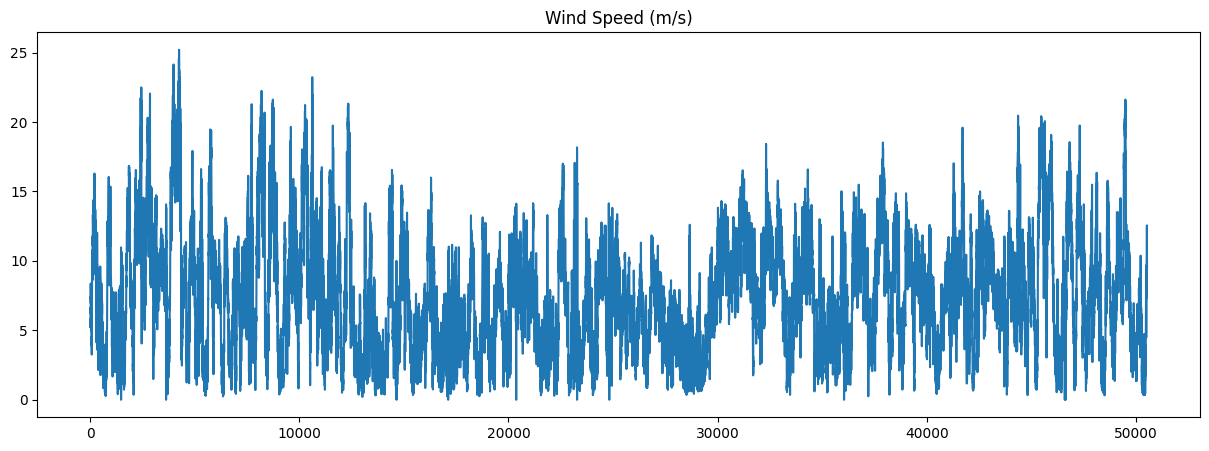

In [ ]:
plt.figure(figsize = (15,5))
train[cols[2]].plot()
plt.title(cols[2])

Text(0.5, 1.0, 'Wind Speed (m/s)')

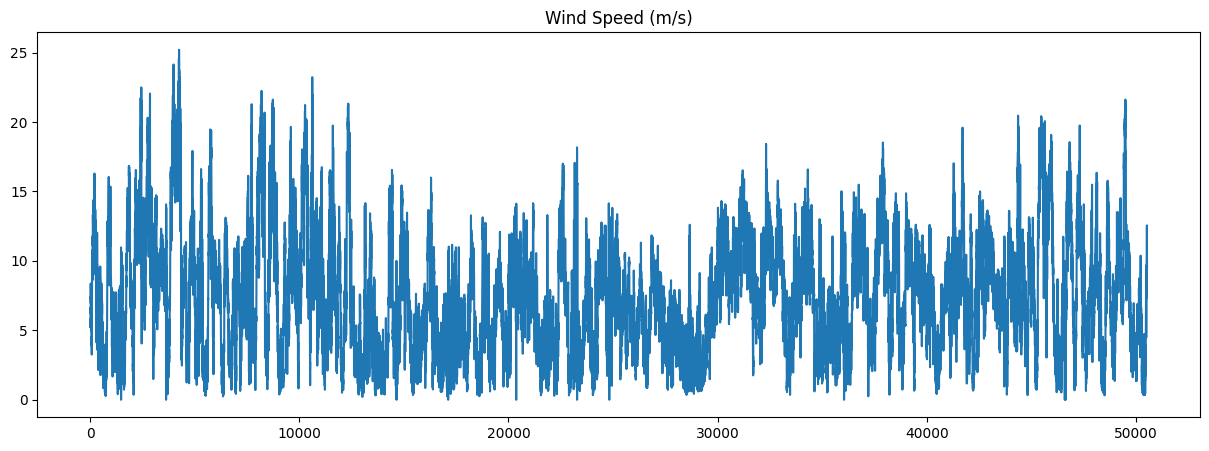

In [ ]:
plt.figure(figsize = (15,5))
test[cols[2]].plot()
plt.title(cols[2])

In [ ]:
train[cols[2] + '+1'] = train[cols[2]].shift(-1)

In [ ]:
train.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Wind Speed (m/s)+1
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,5.672167
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,5.216037
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,5.659674
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,5.577941
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,5.604052


In [ ]:
train.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
Wind Speed (m/s)+1               1
dtype: int64

In [ ]:
train.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Wind Speed (m/s)+1
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,7.332648
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,8.435358
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,9.421366
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,9.979332
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620,NaN


In [ ]:
test[cols[2] + '+1'] = test[cols[2]].shift(-1)

In [ ]:
test.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Wind Speed (m/s)+1
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,5.672167
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,5.216037
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,5.659674
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,5.577941
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,5.604052


In [ ]:
test.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Wind Speed (m/s)+1
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,7.332648
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,8.435358
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,9.421366
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,9.979332
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620,NaN


In [ ]:
trainX = train[cols[2]][:-1].values
testX = test[cols[2]][:-1].values

In [ ]:
## set the response/predictor
trainY = train[cols[2]+ '+1'][:-1].values
testY = test[cols[2]+'+1'][:-1].values

In [ ]:
trainX.shape , trainY.shape , testX.shape , testY.shape

((50529,), (50529,), (50529,), (50529,))

In [ ]:
trainX = np.reshape(trainX, (len(trainX), 1, 1))
testX = np.reshape(testX, (len(testX), 1, 1))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4, input_shape=(1, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
50529/50529 - 103s - loss: 2.5553 - 103s/epoch - 2ms/step
Epoch 2/50
50529/50529 - 91s - loss: 0.6049 - 91s/epoch - 2ms/step
Epoch 3/50
50529/50529 - 91s - loss: 0.5979 - 91s/epoch - 2ms/step
Epoch 4/50
50529/50529 - 88s - loss: 0.5941 - 88s/epoch - 2ms/step
Epoch 5/50
50529/50529 - 88s - loss: 0.5929 - 88s/epoch - 2ms/step
Epoch 6/50
50529/50529 - 88s - loss: 0.5905 - 88s/epoch - 2ms/step
Epoch 7/50
50529/50529 - 87s - loss: 0.5900 - 87s/epoch - 2ms/step
Epoch 8/50
50529/50529 - 88s - loss: 0.5886 - 88s/epoch - 2ms/step
Epoch 9/50
50529/50529 - 87s - loss: 0.5885 - 87s/epoch - 2ms/step
Epoch 10/50
50529/50529 - 89s - loss: 0.5885 - 89s/epoch - 2ms/step
Epoch 11/50
50529/50529 - 88s - loss: 0.5870 - 88s/epoch - 2ms/step
Epoch 12/50
50529/50529 - 87s - loss: 0.5858 - 87s/epoch - 2ms/step
Epoch 13/50
50529/50529 - 88s - loss: 0.5849 - 88s/epoch - 2ms/step
Epoch 14/50
50529/50529 - 87s - loss: 0.5839 - 87s/epoch - 2ms/step
Epoch 15/50
50529/50529 - 87s - loss: 0.5833 - 87s/epoc

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1580/1580 [==============================] - 2s 2ms/step


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
print("R2 score :{}".format(r2_score(testY, testPredict)))
testMAE = mean_absolute_error(testY, testPredict)
print('Test MAE: %.2f' % (testMAE))

# Calculate test accuracy
# Assuming this is a regression problem, we'll interpret accuracy as the inverse of normalized error
# For classification, a different method would be used
accuracy = 1 - (testMAE / np.mean(testY))
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

Train Score: 0.75 RMSE
Test Score: 0.75 RMSE
R2 score :0.9681165939934386
Test MAE: 0.53
Test Accuracy: 92.96%


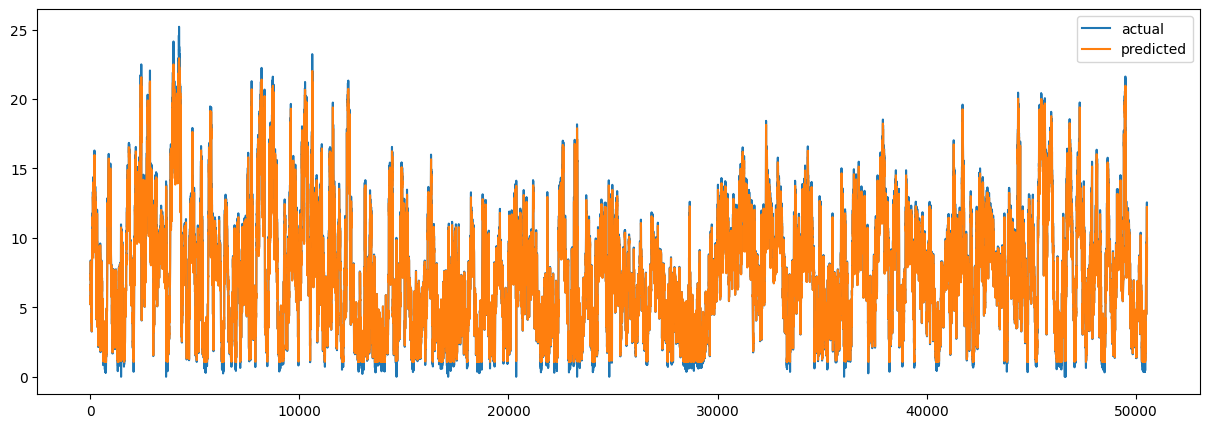

In [ ]:
plt.figure(figsize = (15,5))
## create a df with the required test set dates as index
result_df = test[cols[2] + '+1'][:-1].reset_index()
result_df['predicted'] = testPredict
#result_df.set_index(['Date'], inplace = True)
plt.plot(result_df[cols[2]+ '+1'] , label = 'actual')
plt.plot(result_df['predicted'] , label = 'predicted')
plt.legend()

Length of test: 50529
Length of testPredict: 50529
Length of result_df: 50529


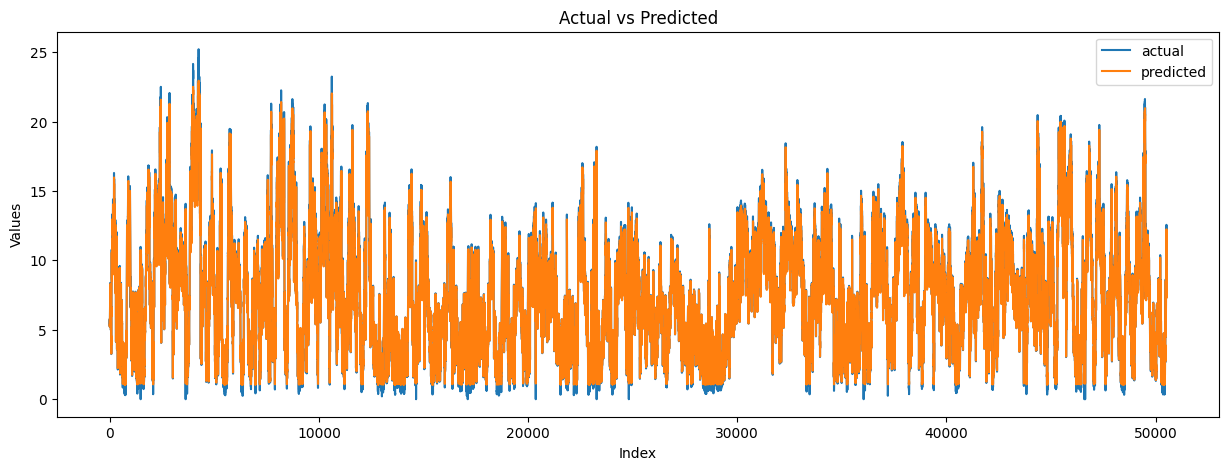

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test' and 'testPredict' are already defined, and 'cols' is the list of column names

# Step 1: Check for duplicate rows in the test DataFrame
duplicates = test.duplicated()
if duplicates.any():
    print("There are duplicate rows in the dataset. Removing duplicates...")
    test = test.drop_duplicates()

# Step 2: Check for NaN/Null values in the test DataFrame
null_values = test.isnull().sum()
if null_values.any():
    print("There are NaN/Null values in the dataset. Handling NaN/Null values...")
    print(null_values)
    # Handling NaN values - you can choose to fill or drop them
    test = test.dropna()

# Debug: Check the lengths of test and testPredict
print(f"Length of test: {len(test)}")
print(f"Length of testPredict: {len(testPredict)}")

# Step 3: Create a DataFrame with the required test set dates as index and reset the index
# Adjust slicing based on the length of testPredict
if len(test) != len(testPredict):
    result_df = test[[cols[2] + '+1']].iloc[:len(testPredict)].reset_index()
else:
    result_df = test[[cols[2] + '+1']].reset_index()

# Debug: Check the lengths after slicing
print(f"Length of result_df: {len(result_df)}")

result_df['predicted'] = testPredict

# Ensure the length of 'testPredict' matches the length of 'result_df'
if len(result_df) != len(testPredict):
    raise ValueError("Length of 'result_df' and 'testPredict' do not match. Please check your data.")

# Step 4: Plot the actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(result_df[cols[2] + '+1'], label='actual')
plt.plot(result_df['predicted'], label='predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()
